In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
      app_id='com.mobile.legends',
      lang='id',
      country='id',
      sort=Sort.MOST_RELEVANT,
      count=10000,
      filter_score_with=None
)


In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,af25da00-89b3-4b25-84ba-5fb9706bda83,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sepandai apapun kalian bermain,, monoton akan ...",2,2101,1.9.29.10113,2024-11-14 11:28:50,None,NaT,1.9.29.10113
1,32fff8c0-e93a-48bb-8074-0b7a06727a61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sih tapi cuman ada satu kendala yaitu pa...,5,9219,1.9.29.10113,2024-11-09 11:42:00,None,NaT,1.9.29.10113
2,a041ecd7-8baf-47cd-a599-b69b1f17f222,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong Perbaiki lagi sistemnya,tidak classic t...",1,9735,1.9.29.10113,2024-11-13 13:12:53,None,NaT,1.9.29.10113
3,542c110f-1fe7-4126-a7e2-f960edad898f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya kasi bintang 2 aja, karena apa? Ya karena...",2,992,1.9.29.10113,2024-11-13 06:54:31,None,NaT,1.9.29.10113
4,76aeed7b-53ab-4006-9568-d49abf5948fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk gamenya sudah bagus ya, tapi untuk beber...",1,3042,1.9.29.10113,2024-11-13 13:03:01,None,NaT,1.9.29.10113


In [5]:
len(df_busu.index)

10000

In [6]:
df_busu[['userName', 'score', 'at', 'content']].head()

,userName,score,at,content
0,Pengguna Google,2,2024-11-14 11:28:50,"Sepandai apapun kalian bermain,, monoton akan ..."
1,Pengguna Google,5,2024-11-09 11:42:00,Bagus sih tapi cuman ada satu kendala yaitu pa...
2,Pengguna Google,1,2024-11-13 13:12:53,"Tolong Perbaiki lagi sistemnya,tidak classic t..."
3,Pengguna Google,2,2024-11-13 06:54:31,"Saya kasi bintang 2 aja, karena apa? Ya karena..."
4,Pengguna Google,1,2024-11-13 13:03:01,"Untuk gamenya sudah bagus ya, tapi untuk beber..."


In [7]:
new_df = df_busu[['userName', 'score', 'at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
376,Pengguna Google,1,2024-11-22 19:55:42,Ayolah moonton tolong perbaiki sistem macthmak...
9843,Rifa'i Ahmacd,1,2024-11-22 15:48:23,"Game ampas, perbaikin tuh matchmaking yang adi..."
211,Pengguna Google,1,2024-11-22 06:26:09,"Moonton²,kenapa makin aneh ni game,bukanya men..."
4836,Pengguna Google,5,2024-11-22 04:45:27,"geme keren nggak ngebosenin, cocok untuk yang ..."
1238,Pengguna Google,1,2024-11-22 03:03:53,Game nya sangat membosankan untuk dimainkan ka...


In [8]:
my_df = sorted_df[['userName', 'score', 'at', 'content']]

In [9]:
my_df.head()

,userName,score,at,content
376,Pengguna Google,1,2024-11-22 19:55:42,Ayolah moonton tolong perbaiki sistem macthmak...
9843,Rifa'i Ahmacd,1,2024-11-22 15:48:23,"Game ampas, perbaikin tuh matchmaking yang adi..."
211,Pengguna Google,1,2024-11-22 06:26:09,"Moonton²,kenapa makin aneh ni game,bukanya men..."
4836,Pengguna Google,5,2024-11-22 04:45:27,"geme keren nggak ngebosenin, cocok untuk yang ..."
1238,Pengguna Google,1,2024-11-22 03:03:53,Game nya sangat membosankan untuk dimainkan ka...


In [10]:
my_df.to_csv("scrapped_data.csv", index = False)

In [11]:
datamlbb = pd.read_csv('scrapped_data.csv')
datamlbb.head()

,userName,score,at,content
0,Pengguna Google,1,2024-11-22 19:55:42,Ayolah moonton tolong perbaiki sistem macthmak...
1,Rifa'i Ahmacd,1,2024-11-22 15:48:23,"Game ampas, perbaikin tuh matchmaking yang adi..."
2,Pengguna Google,1,2024-11-22 06:26:09,"Moonton²,kenapa makin aneh ni game,bukanya men..."
3,Pengguna Google,5,2024-11-22 04:45:27,"geme keren nggak ngebosenin, cocok untuk yang ..."
4,Pengguna Google,1,2024-11-22 03:03:53,Game nya sangat membosankan untuk dimainkan ka...


In [12]:
df = pd.read_csv('scrapped_data.csv')
df.head(10)

,userName,score,at,content
0,Pengguna Google,1,2024-11-22 19:55:42,Ayolah moonton tolong perbaiki sistem macthmak...
1,Rifa'i Ahmacd,1,2024-11-22 15:48:23,"Game ampas, perbaikin tuh matchmaking yang adi..."
2,Pengguna Google,1,2024-11-22 06:26:09,"Moonton²,kenapa makin aneh ni game,bukanya men..."
3,Pengguna Google,5,2024-11-22 04:45:27,"geme keren nggak ngebosenin, cocok untuk yang ..."
4,Pengguna Google,1,2024-11-22 03:03:53,Game nya sangat membosankan untuk dimainkan ka...
5,Pengguna Google,1,2024-11-21 15:05:25,Gak mau sekalian hapus fitur chat? ngomong yan...
6,Pengguna Google,1,2024-11-21 13:33:40,Diary moonton kpn di benerin untuk penguna sma...
7,Pengguna Google,3,2024-11-21 12:51:50,"Gua mau konflen, gua main solo, trus Mabar sam..."
8,Pengguna Google,1,2024-11-21 10:32:44,"Setiap hari main pasti ketemu dark system, tem..."
9,Iksan,1,2024-11-21 10:22:33,Game goblok masa ngebug terus keluar terus dar...


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [14]:
data = pd.read_csv('scrapped_data.csv')
data.head()

,userName,score,at,content
0,Pengguna Google,1,2024-11-22 19:55:42,Ayolah moonton tolong perbaiki sistem macthmak...
1,Rifa'i Ahmacd,1,2024-11-22 15:48:23,"Game ampas, perbaikin tuh matchmaking yang adi..."
2,Pengguna Google,1,2024-11-22 06:26:09,"Moonton²,kenapa makin aneh ni game,bukanya men..."
3,Pengguna Google,5,2024-11-22 04:45:27,"geme keren nggak ngebosenin, cocok untuk yang ..."
4,Pengguna Google,1,2024-11-22 03:03:53,Game nya sangat membosankan untuk dimainkan ka...


In [15]:
data = data.dropna()

data['clean_text'] = data['content'].str.replace('[^\w\s]', '')

data['clean_text'] = data['clean_text'].str.lower()

nltk.download('stopwords')
stop = stopwords.words('english')
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


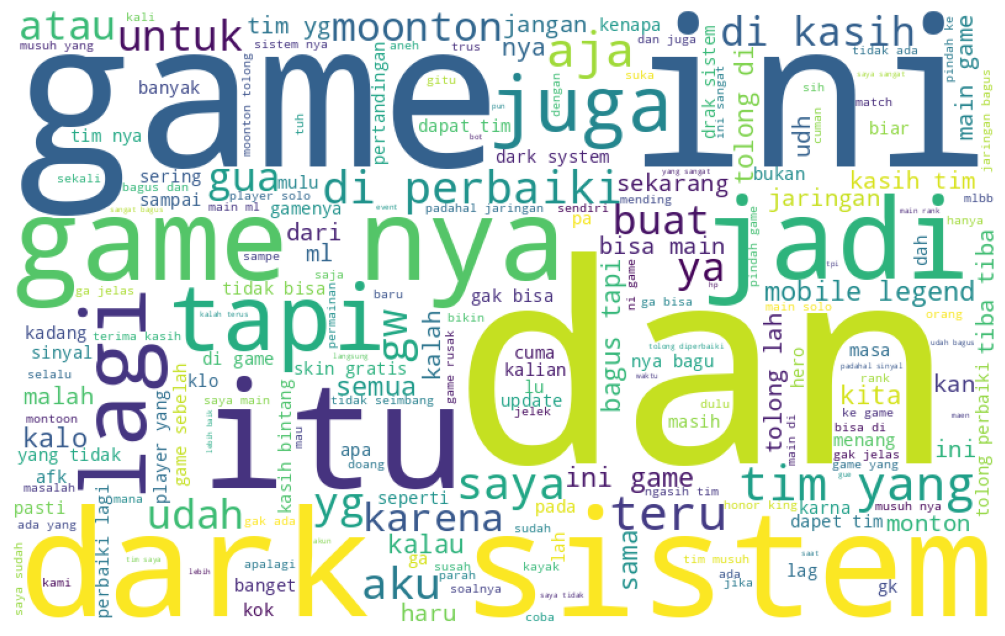

In [16]:
all_text = ' '.join(data['clean_text'])

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('indonesian'))
stop_words.update(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'gak', 'saya', 'nya', 'ini', 'jadi', 'dan', 'tapi', 'teru', 'gua', 'aja', 'main','bagu', 'ga'])

In [20]:
data['clean_text'] = data['content'].str.replace('[^\w\s]', '')
data['clean_text'] = data['clean_text'].str.lower()
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

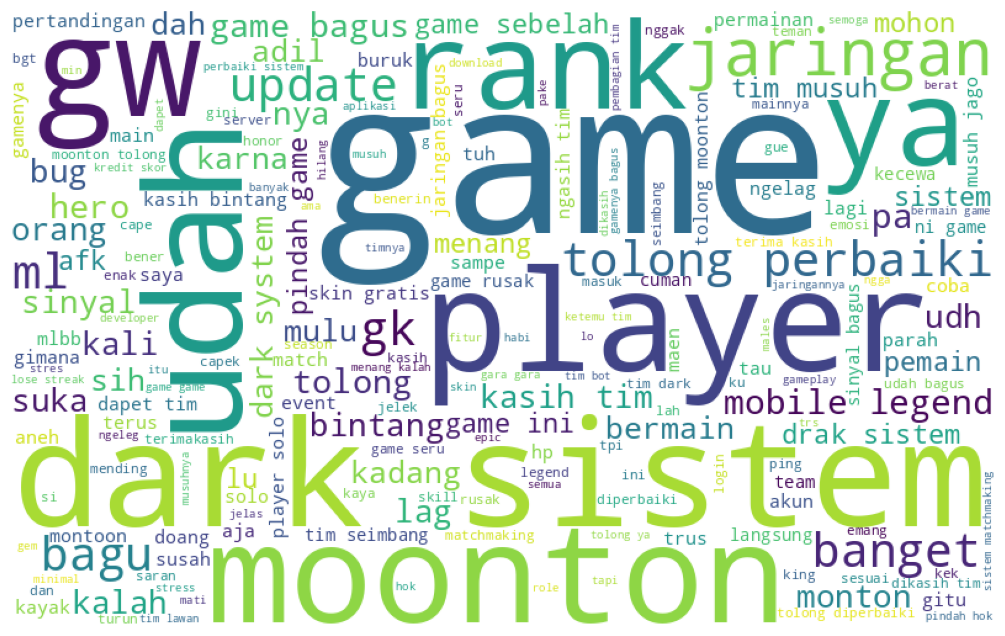

In [21]:
all_text = ' '.join(data['clean_text'])

wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
!pip install pandas scikit-learn nltk

In [11]:
import pandas as pd

data = pd.read_csv('scrapped_data.csv')
data.head()

,userName,score,at,content
0,Pengguna Google,1,2024-11-22 19:55:42,Ayolah moonton tolong perbaiki sistem macthmak...
1,Rifa'i Ahmacd,1,2024-11-22 15:48:23,"Game ampas, perbaikin tuh matchmaking yang adi..."
2,Pengguna Google,1,2024-11-22 06:26:09,"Moonton²,kenapa makin aneh ni game,bukanya men..."
3,Pengguna Google,5,2024-11-22 04:45:27,"geme keren nggak ngebosenin, cocok untuk yang ..."
4,Pengguna Google,1,2024-11-22 03:03:53,Game nya sangat membosankan untuk dimainkan ka...


In [12]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

data = data[['content', 'score']]

data['sentiment'] = data['score'].apply(lambda x: 1 if x > 3 else 0)  # 1 = Positif, 0 = Negatif

X = data['content']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

<ipython-input-12-fd586469026c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['score'].apply(lambda x: 1 if x > 3 else 0)  # 1 = Positif, 0 = Negatif


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

y_pred_nb = nb_model.predict(X_test_vectorized)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vectorized, y_train)

y_pred_knn = knn_model.predict(X_test_vectorized)

In [14]:
print("Evaluasi Model Naive Bayes:")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Evaluasi Model Naive Bayes:
Akurasi: 0.816
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1447
           1       0.72      0.55      0.62       553

    accuracy                           0.82      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.81      0.82      0.81      2000



In [15]:
print("Evaluasi Model KNN:")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Evaluasi Model KNN:
Akurasi: 0.6835
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1447
           1       0.43      0.48      0.45       553

    accuracy                           0.68      2000
   macro avg       0.61      0.62      0.62      2000
weighted avg       0.69      0.68      0.69      2000

